In [96]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tools.camera import *
from skimage.exposure import adjust_gamma, adjust_log, adjust_sigmoid
from skimage.morphology import disk
from skimage.filters import rank

In [2]:
def plot_img(img, cmap=None):
    f, ax = plt.subplots(1, 1, figsize = (15, 10))
    if cmap is None:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap)      
        
def plot_two_img(img1, img2):
    f, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].imshow(img1)
    ax[1].imshow(img2)

In [288]:
def generate_fsi_2(rgb, r_ch, g_ch):

    g_ch = reduce_outliers(g_ch, 0, 0.01)
    r_ch = reduce_outliers(r_ch, 0, 0.01)

    diff = r_ch.astype(np.int32) - g_ch.astype(np.int32)

    g_ch = stretch_img(g_ch, r_ch.max() - r_ch.min(), r_ch.min())
    ndri = diff / g_ch

    
    ndri_ch = stretch_img(ndri, 255, 0)
    ndri_ch = adjust_gamma(ndri_ch, 1/2)
    
    
    g_ch = stretch_img(g_ch, 255, 0)

    res = rgb.copy()
    res[:, :, 0] = ndri_ch
    res[:, :, 1] = g_ch
    
    return res.astype(np.uint8)


In [289]:
fp = r'C:\Users\Matan\Documents\Projects\Data\wetransfer_jai_samples_2022-08-11_0745\JAI_Samples'
folder_list = os.listdir(fp)
files = []
for folder in folder_list:
    file_list = os.listdir(os.path.join(fp, folder))
    temp = file_list[0].split('.')[0]
    id = temp.split('_')[-1]
    
    rgb = os.path.join(fp, folder, f'Stream0_{id}.tiff')
    r_ch = os.path.join(fp, folder, f'Stream1_{id}.tiff')
    g_ch = os.path.join(fp, folder, f'Stream2_{id}.tiff')
    
    files.append([rgb, r_ch, g_ch])
    
    

In [290]:
rgb_p, r_ch_p, g_ch_p = files[0]

In [291]:
rgb = np.array(Image.open(rgb_p))
r_ch = np.array(Image.open(r_ch_p))
#r_ch = cv2.cvtColor(r_ch, cv2.COLOR_BGR2GRAY)
g_ch = np.array(Image.open(g_ch_p))
#g_ch = cv2.cvtColor(g_ch, cv2.COLOR_BGR2GRAY)

In [292]:
fsi_n = generate_fsi(rgb, r_ch, g_ch)
fsi_n2 = generate_fsi_2(rgb, r_ch, g_ch)
fsi_o = old_fsi(rgb, r_ch, g_ch)

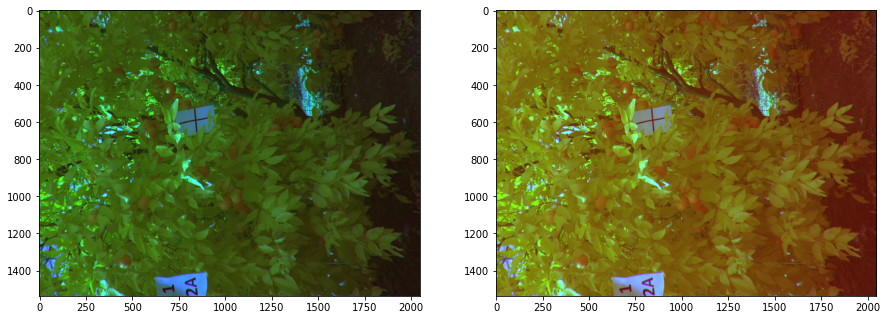

In [293]:
plot_two_img(fsi_n, fsi_n2)

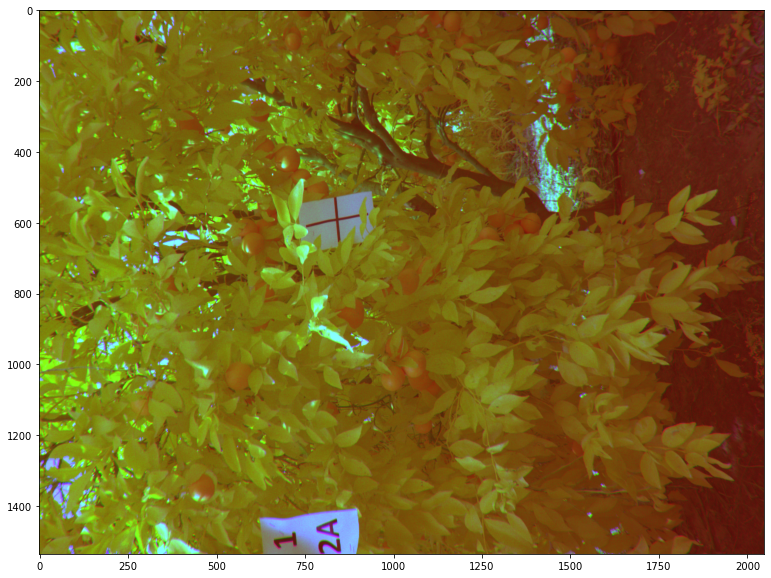

In [294]:
plot_img(fsi_n2)

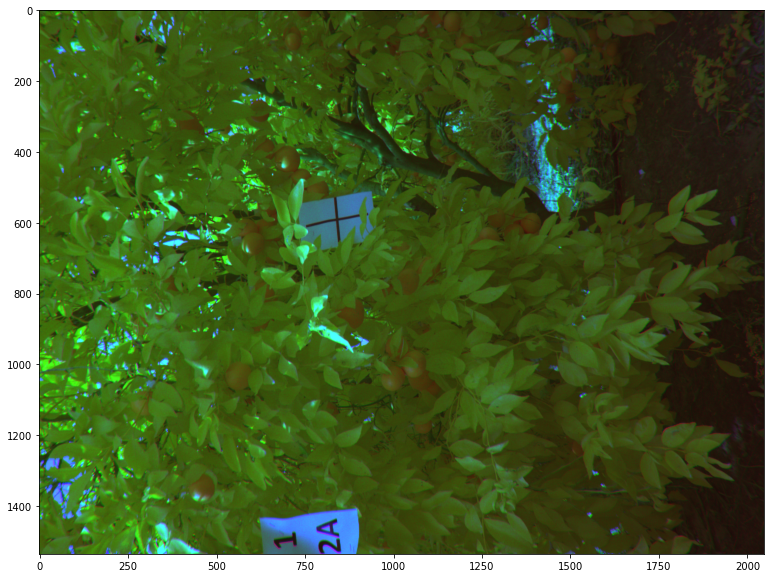

In [296]:
plot_img(fsi_n)

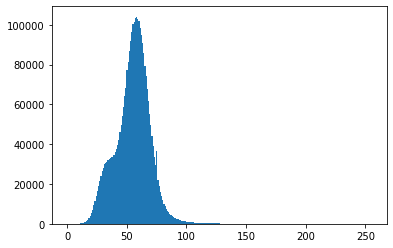

In [232]:
_ = plt.hist(fsi_n[:,:,0].flatten(),256)

In [233]:
fsi_n[:,:,0].max()

255

In [237]:
ndri = fsi_n[:,:,0].copy()

In [238]:
ndri[ndri>150] = 150

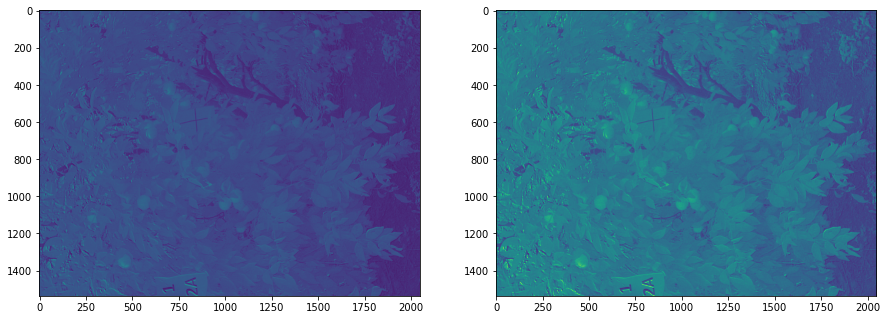

In [241]:
plot_two_img(fsi_n[:,:,0],ndri)

In [242]:
mask = np.where(fsi_n[:,:,0] > 150, 1, 0)

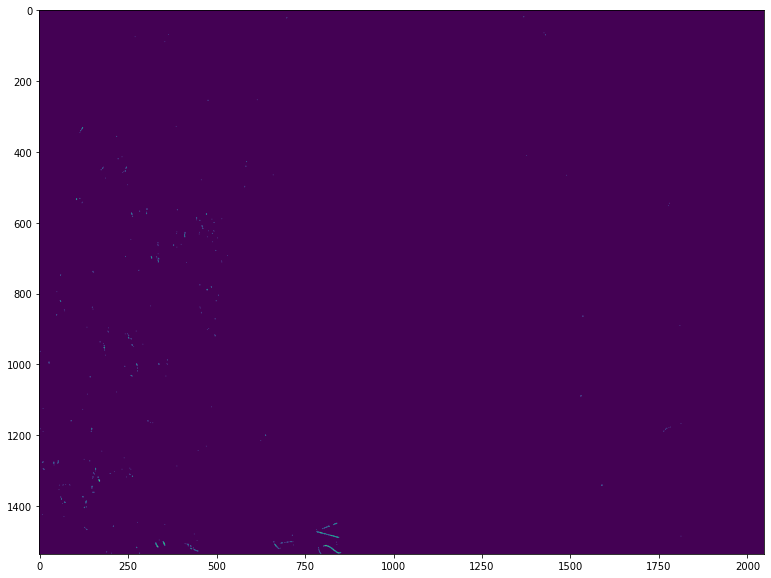

In [243]:
plot_img(mask)